In [1]:
import torch
from datasets import *
import visualizer
import models
import matplotlib.pyplot as plt


In [2]:
M_model_state_dict = torch.load(
    'noise_models/spiral_M-DYR-H/0.0/best_epoch_20.pth')
LRM_model_state_dict = torch.load(
    'noise_models/spiral_LRM-DYR-H/0.0/best_epoch_49.pth')


In [3]:
M_model = models.SpiralModel()
M_model.load_state_dict(M_model_state_dict)
LRM_model = models.SpiralModel()
LRM_model.load_state_dict(LRM_model_state_dict)


<All keys matched successfully>

In [4]:
trainset, _, testset = get_spiral_datasets("datasets")

train_loader = torch.utils.data.DataLoader(
    trainset, batch_size=len(trainset), shuffle=True, num_workers=1, pin_memory=True)

x_train, y_train = next(iter(train_loader))


/home/masonwang/anaconda3/envs/lnoise-analysis/lib/python3.8/site-packages/torch/cuda/__init__.py:52: UserWarning: CUDA initialization: Unexpected error from cudaGetDeviceCount(). Did you run some cuda functions before calling NumCudaDevices() that might have already set an error? Error 804: forward compatibility was attempted on non supported HW (Triggered internally at  /opt/conda/conda-bld/pytorch_1623448234945/work/c10/cuda/CUDAFunctions.cpp:115.)
  return torch._C._cuda_getDeviceCount() > 0


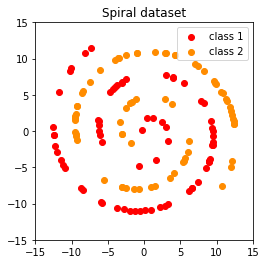

0.5


In [8]:
visualizer.plot_spiral_dataset(x_train, y_train)
print(list(y_train).count(0) / len(y_train))

In [6]:
xi = np.arange(-15, 15, 0.1)
xj = np.arange(-15, 15, 0.1)
x_sample = np.array([[j, i] for i in xi for j in xj])
out = M_model(torch.tensor(x_sample))
out.shape

torch.Size([90000, 2])

<ipython-input-28-f61e65e1a030>:7: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(x, y, confidence)


AttributeError: 'Spine' object has no attribute 'get_array'

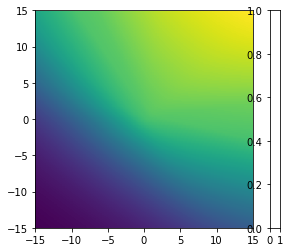

In [28]:
# get P(Y=1|X)
confidence = torch.transpose(torch.nn.functional.softmax(out, dim=1), 0, 1)[
    1].detach().numpy()
confidence = confidence.reshape((len(xi), len(xj)))
x, y = np.meshgrid(xi, xj)

plt.pcolormesh(x, y, confidence)
plt.xlim(-15, 15)
plt.ylim(-15, 15)
plt.draw()

ax = plt.gca()
PCM = ax.get_children()[2]
ax.set_aspect('equal', adjustable='box')
plt.colorbar(PCM, ax=ax)
plt.show()


In [20]:
def get_dim(x, y, dim=0, label_class=0, subset=500):
    return x[y == label_class, dim][:subset]

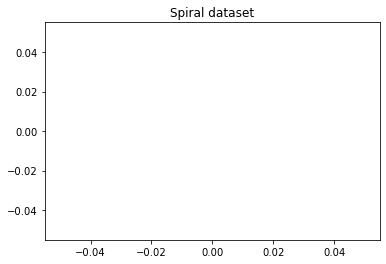

In [23]:
y_train_class = visualizer.one_hot_to_index_vector(y_train)
x_d0_l0 = get_dim(x_train, y_train_class, dim=0, label_class=0)
x_d1_l0 = get_dim(x_train, y_train_class, dim=1, label_class=0)
x_d0_l1 = get_dim(x_train, y_train_class, dim=0, label_class=1)
x_d1_l1 = get_dim(x_train, y_train_class, dim=1, label_class=1)

plt.title('Spiral dataset')
plt.plot(x_d0_l0, x_d1_l0, '.', label='class 0')
plt.plot(x_d0_l1, x_d1_l1, '.', label='class 1')


AttributeError: 'Spine' object has no attribute 'get_array'

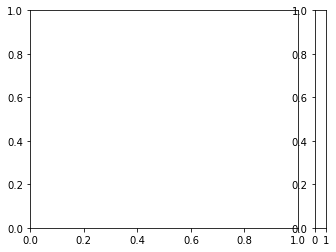